1.Loaded the libraries and loaded the dataset using pandas dataframe.and divided that to two separate X and Y dataframes.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


D3 = pd.read_csv('C:\Users\saikiran\Desktop\spambase.txt', delimiter = ',' ,names=('word_freq_make:', 'word_freq_address:', 'word_freq_all:', 'word_freq_3d:', 'word_freq_our:', 'word_freq_over:', 'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:', 'word_freq_mail:','word_freq_receive:','word_freq_will:','word_freq_people:','word_freq_report:','word_freq_addresses:','word_freq_free:','word_freq_business:','word_freq_email:','word_freq_you:','word_freq_credit:','word_freq_your:','word_freq_font:','word_freq_000:','word_freq_money:','word_freq_hp:','word_freq_hpl:','word_freq_george:','word_freq_650:','word_freq_lab:','word_freq_labs:','word_freq_telnet:','word_freq_857:','word_freq_data:','word_freq_415:','word_freq_85:','word_freq_technology:','word_freq_1999:','word_freq_parts:','word_freq_pm:','word_freq_direct:','word_freq_cs:','word_freq_meeting:','word_freq_original:','word_freq_project:','word_freq_re:','word_freq_edu:','word_freq_table:','word_freq_conference:','char_freq_;:','char_freq_(:','char_freq_[:','char_freq_!:','char_freq_$:','char_freq_#:','capital_run_length_average:','capital_run_length_longest:','capital_run_length_total:','spam class:'))
#print(D3)
X = D3.iloc[:, :-1]
Y = D3.iloc[:, -1:]
print(X.head())
print(Y.head())

   word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0             0.00                0.64            0.64            0.0   
1             0.21                0.28            0.50            0.0   
2             0.06                0.00            0.71            0.0   
3             0.00                0.00            0.00            0.0   
4             0.00                0.00            0.00            0.0   

   word_freq_our:  word_freq_over:  word_freq_remove:  word_freq_internet:  \
0            0.32             0.00               0.00                 0.00   
1            0.14             0.28               0.21                 0.07   
2            1.23             0.19               0.19                 0.12   
3            0.63             0.00               0.31                 0.63   
4            0.63             0.00               0.31                 0.63   

   word_freq_order:  word_freq_mail:            ...              \
0              0.00      

2.Dividing the dataframe to training and testing datasets respectively

In [5]:
np.random.seed(0)
msk = np.random.rand(len(X)) < 0.8
X_train = X[msk].values
X_test = X[~msk].values
Y_train = Y[msk].values.reshape((3675))
Y_test = Y[~msk].values.reshape((926))
print((X_train.shape))
print((X_test.shape))
print(Y_train.shape)
print(Y_test.shape)


(3675L, 57L)
(926L, 57L)
(3675L,)
(926L,)


3.Defined an SVC classifier function which processes the trains the svm model and tests that with test dataset. This fuction returns misclassification rate and accuracy rate.

In [6]:
def SVC_classifier(X_train,X_test,Y_train,Y_test,c,misclassification,c_new,accuracy):
    model1 = LinearSVC(C=c)
    model1.fit(X_train,Y_train)
    result1 = model1.predict(X_test)
    
    count=0
    for i in range(len(Y_test)):
        if(result1[i]==Y_test[i]):
            count = count+1
    
    #accuracy_rate = (count*100)/len(Y_test)
    accuracy_rate = accuracy_score(Y_test, result1)
    c_new=np.append(c_new,c)
    misclassification_rate = len(Y_test) - count
    accuracy=np.append(accuracy,accuracy_rate)
    misclassification = np.append(misclassification,misclassification_rate)
   
    
    return misclassification,c_new,accuracy



4.Passed different values of C from 0.1 to 20 to the svc_classifier function and plotted the misclassification rate and accuracy rate against each value of c. 

misclassification rate is: [  90.   95.  112.  143.  190.  103.  159.  257.  172.  328.  270.  145.
  107.  170.  112.  182.  125.  144.  222.  152.  172.  210.  137.  224.
  158.  233.  152.  149.  163.  157.  132.  158.  132.  136.  238.  127.
  146.  125.  263.  146.  156.  138.  161.  161.  179.  162.  159.  135.
  118.  118.  247.  170.  155.  207.  170.  279.  169.  162.  234.  131.
  163.  199.  220.  174.  259.  157.  144.  131.  143.  157.  153.  134.
  318.  119.  149.  170.  235.  143.  194.  174.  160.  197.  145.  138.
  188.  128.  159.  151.  234.  140.  141.  168.  183.  166.  166.  160.
  295.  227.  129.  285.  131.  110.  164.  122.  142.  211.  163.  115.
  152.  119.  152.  142.  171.  199.  208.  315.  119.  383.  162.  155.
  233.  147.  191.  161.  142.  131.  162.  134.  154.  267.  196.  183.
  331.  166.  151.  167.  167.  299.  176.  148.  162.  181.  155.  159.
  179.  206.  135.  141.  143.  427.  171.  151.  164.  217.  157.  229.
  156.  156.  113.  145.

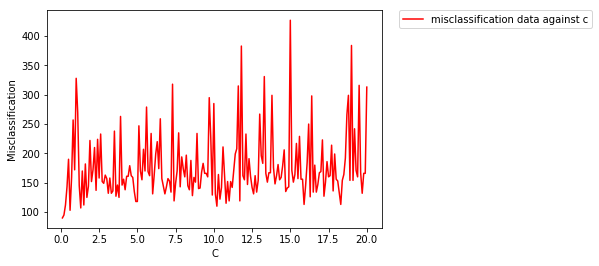

In [7]:

C_score = 0 
C =[]
for i in range(200):
    C_score = C_score + 0.1
    C = np.append(C,C_score)

misclassification=[]
accuracy=[]

c_new =[]
for a in C:
    misclassification,c_new,accuracy = SVC_classifier(X_train,X_test,Y_train,Y_test,a,misclassification,c_new,accuracy)
print "misclassification rate is:", misclassification
print "accuracy is :", accuracy
plt.plot( c_new, misclassification, color='red', label = "misclassification data against c")
plt.xlabel("C")
plt.ylabel("Misclassification")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#print confusion_matrix(Y_test, result1)

5.plotted accuracy rate against c.

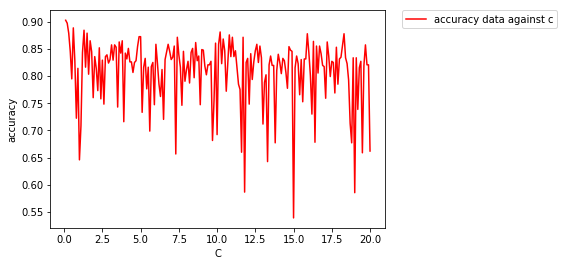

In [5]:

plt.plot( c_new, accuracy, color='red', label = "accuracy data against c")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

6.Performed grid search with cv_value =5.

In [8]:
parameter = {'C': [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
model1 = LinearSVC()
clf = GridSearchCV(model1, parameter, cv = 5)
clf.fit(X_train,Y_train)
#best_estimator = clf.best_estimator_.C
#print(best_estimator)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

[ 0.8462585   0.75782313  0.76870748  0.82530612  0.80326531  0.82095238
  0.8092517   0.76462585  0.82884354  0.78285714  0.84517007  0.80734694
  0.81687075  0.80843537  0.81088435  0.80435374  0.81904762  0.83836735
  0.78367347  0.79319728]


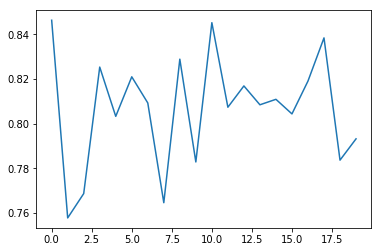

In [9]:
best_parameter = clf.cv_results_['mean_test_score']
print(best_parameter)
plt.plot(best_parameter,'-')
plt.show()

# The best mean test score is when C =0 and score os 0.84

# Exercise 2

# SVM vs Logistic Regression for dataset D3

7.Defined a logistic_regr function and trained the model and used test dataset to calculate the misclassification and accuracy.

In [10]:

def logistic_Regr(X_train,X_test,Y_train,Y_test,c,misclassification,c_new,accuracy):
    clf = LogisticRegression(C = c)
    clf.fit(X_train,Y_train)
    result1 = clf.predict(X_test)
    count=0
    for i in range(len(Y_test)):
        if(result1[i]==Y_test[i]):
            count = count+1
    #accuracy_rate = (count*100)/len(Y_test)
    accuracy_rate = accuracy_score(Y_test, result1)
    c_new=np.append(c_new,c)
    misclassification_rate = len(Y_test) - count
    accuracy=np.append(accuracy,accuracy_rate)
    misclassification = np.append(misclassification,misclassification_rate)
   
    
    return misclassification,c_new,accuracy





8.Passed different values of C from 0.1 to 20 to the logistic_regr function and plotted the misclassification rate and accuracy rate against each value of c.

misclassification is: [ 65.  66.  68.  67.  63.  60.  59.  58.  60.  57.  58.  58.  58.  59.  59.
  58.  58.  58.  58.  59.  64.  59.  59.  60.  59.  60.  59.  58.  59.  61.
  59.  60.  60.  60.  60.  59.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  57.  60.  60.  60.  66.  59.  60.  60.  60.  59.  76.
  60.  59.  59.  60.  60.  60.  60.  60.  59.  61.  59.  60.  59.  60.  59.
  58.  58.  59.  60.  60.  60.  59.  58.  59.  58.  58.  59.  58.  58.  59.
  59.  59.  58.  59.  58.  58.  60.  60.  58.  58.  58.  59.  58.  58.  58.
  59.  58.  59.  59.  60.  58.  58.  59.  59.  58.  59.  61.  58.  60.  59.
  59.  60.  60.  58.  59.  58.  64.  60.  58.  63.  60.  62.  58.  80.  58.
  59.  60.  59.  59.  58.  59.  58.  62.  59.  59.  59.  65.  58.  61.  60.
  58.  61.  58.  58.  58.  60.  60.  60.  60.  60.  58.  60.  60.  59.  60.
  60.  58.  60.  60.  58.  60.  58.  58.  59.  64.  60.  58.  60.  60.  59.
  58.  60.  60.  60.  60.  60.  59.  59.  60.  59.  60.  60.  60. 

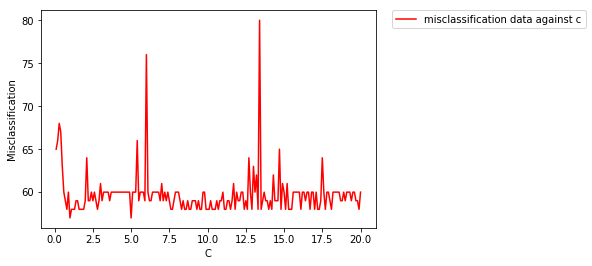

In [12]:

C_score_lr = 0 
C_lr =[]
for i in range(200):
    C_score_lr = C_score_lr + 0.1
    C_lr = np.append(C_lr,C_score_lr)

misclassification_lr=[]
accuracy_lr=[]

c_new_lr =[]
for a in C_lr:
    misclassification_lr,c_new_lr,accuracy_lr = logistic_Regr(X_train,X_test,Y_train,Y_test,a,misclassification_lr,c_new_lr,accuracy_lr)
print "misclassification is:",misclassification_lr
print "accuracy is:",accuracy_lr
plt.plot( c_new_lr, misclassification_lr, color='red', label = "misclassification data against c")
plt.xlabel("C")
plt.ylabel("Misclassification")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

9.Plotted accuracy against different C .

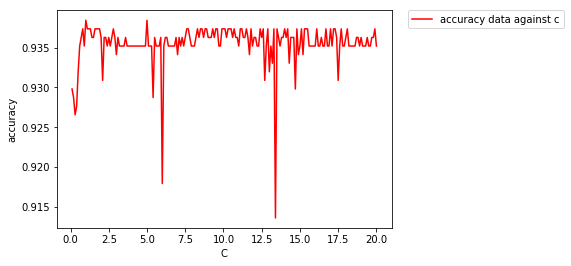

In [13]:
plt.plot( c_new_lr, accuracy_lr, color='red', label = "accuracy data against c")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

10.Performed grid search with cv_value =5.

In [14]:
parameter_lg = {'C': [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
model2 = LogisticRegression()
clf_lg = GridSearchCV(model2, parameter_lg, cv = 5)
clf_lg.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

[ 0.90693878  0.90829932  0.90829932  0.91020408  0.90965986  0.90884354
  0.90884354  0.90884354  0.90666667  0.90938776  0.90938776  0.90993197
  0.90857143  0.90911565  0.91047619  0.90884354  0.90938776  0.90938776
  0.90857143  0.90802721]


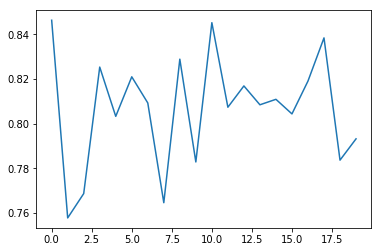

In [16]:
best_parameter_lg = clf_lg.cv_results_['mean_test_score']
print(best_parameter_lg)
plt.plot(best_parameter,'-')
plt.show()

# The best mean test score is when C =1.5 and score is 0.91.. Logistic regression is provinding better accuracy when compared to svm model for this dataset


# Convert Dataset D3 to libsvm

11.Loaded the spambase dataset using pandas dataframe

In [18]:
D4 = pd.read_csv('C:\Users\saikiran\Desktop\spambase.txt', delimiter = ',', header=None)
print(D4.head())

     0     1     2    3     4     5     6     7     8     9  ...    48     49  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00 ...  0.00  0.000   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94 ...  0.00  0.132   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25 ...  0.01  0.143   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.137   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.135   

    50     51     52     53     54   55    56  57  
0  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


12.divided the dataframe to training and testing dataframes.

In [19]:
np.random.seed(0)
msk = np.random.rand(len(D4)) < 0.8
train_data= D4[msk].values
test_data = D4[~msk].values
print((train_data.shape))
print((test_data.shape))


(3675L, 58L)
(926L, 58L)


13.Converting the training dataset to libsvm format and wrote the libsvm form in the training.txt file

In [20]:
data_combine = " "
#iterating the dataset
for k in range(len(train_data)):
    z=""
    data = train_data[k] 
    Y_str = " "
    l = ""
#iterating the values of each row.    
    for i in range(k):
        if(i<57):
            train_i = data[i]
            y = str(train_i)
            l=str(i) +":"+ y +" "
        Y_str += l +""
        if(i==57):
            label = data[i]
            z += str(label)+" "+ Y_str +"\n "
            #print(z)

            
       
    data_combine = data_combine + " "+ z + "\n"
f = open("C:\Users\saikiran\Desktop\Training.txt","w") #opens file with name of "Training.txt"
f.write(data_combine)
f.close()

     
        
    


14.Converting the testing dataset to libsvm format and wrote the libsvm form in the testing.txt file

In [21]:
test_combine = " "
#iterating dataset
for k in range(len(test_data)):
    z_test=""
    data = test_data[k] 
    Y_str = " "
    l = ""
 #iterating each evalue in the row   
    for i in range(k):
        if(i<57):
            test_i = data[i]
            y = str(test_i)
            l=str(i) +":"+ y +" "
        Y_str += l +""
        if(i==57):
            label = data[i]
            z_test += str(label)+" "+ Y_str +"\n "
            #print(z_test)

            
       
    test_combine = test_combine + " "+ z_test + "\n"

f = open("C:\Users\saikiran\Desktop\Testing.txt","w") #opens file with name of "Testing.txt"
f.write(test_combine)
f.close()

     
        
    
